In [5]:
pip install yfinance     #yahoo finance has been installed into python 

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import scipy.stats as si
import matplotlib.pyplot as plt

#All these packages have been imported into python as well to allow calculation as well as graph plotting

In [39]:
initial_data = yf.download("MSFT", start="2020-11-20", end="2021-11-20")   #one year microsoft data has been downloaded from yahoo finance 

[*********************100%***********************]  1 of 1 completed


In [199]:
initial_data.head()  
#.head() shows the first five days of the downloaded data. If nothing is written in the brackets, by default it will show 5 days 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-20,212.199997,213.289993,210.000000,210.389999,208.641113,22843100
2020-11-23,210.949997,212.289993,208.160004,210.110001,208.363434,25683500
2020-11-24,209.589996,214.250000,208.860001,213.860001,212.082245,33979700
2020-11-25,215.110001,215.289993,212.460007,213.869995,212.092178,21012900
2020-11-27,214.850006,216.270004,214.039993,215.229996,213.440872,14512200


In [200]:
initial_data.tail ()
#.tail() shows the first five days of the downloaded data. If nothing is written in the brackets, by default it will show 5 days 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-15,337.540009,337.880005,334.029999,336.070007,335.456299,16723000
2021-11-16,335.679993,340.670013,335.510010,339.510010,338.890015,20886800
2021-11-17,338.940002,342.190002,338.000000,339.119995,339.119995,19053400
2021-11-18,338.179993,342.450012,337.119995,341.269989,341.269989,22463500
2021-11-19,342.640015,345.100006,342.200012,343.109985,343.109985,21963400


In [4]:
data = initial_data ['Adj Close']
#the initial_data Adjusted close has been defined as data

In [128]:
data.head()

Date
2020-11-20    208.641113
2020-11-23    208.363434
2020-11-24    212.082245
2020-11-25    212.092178
2020-11-27    213.440872
Name: Adj Close, dtype: float64

In [129]:
data.tail()

Date
2021-11-15    335.456299
2021-11-16    338.890015
2021-11-17    339.119995
2021-11-18    341.269989
2021-11-19    343.109985
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

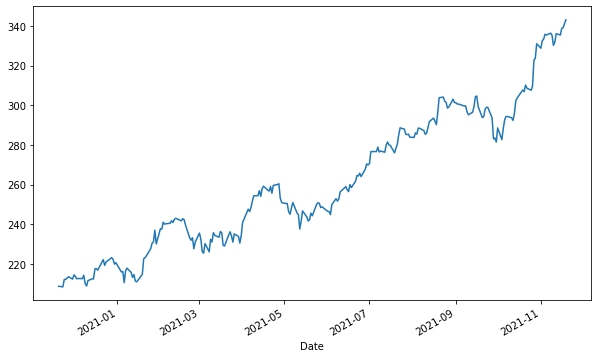

In [130]:
data.plot(figsize=(10, 6), subplots=True)

#the graph of the stock movement has been plotted 

SUMMARY STATISTICS

In [131]:
data.describe().round(2) #These summary statistics show things such as the mean, standard deviation, the min and max price of the stock 

count    252.00
mean     261.80
std       35.30
min      208.36
25%      233.71
50%      254.34
75%      290.59
max      343.11
Name: Adj Close, dtype: float64

CHANGES OVER TIME

In [132]:
data.diff().head()   #Changes over time shows the daily change in price of the stock 

Date
2020-11-20         NaN
2020-11-23   -0.277679
2020-11-24    3.718811
2020-11-25    0.009933
2020-11-27    1.348694
Name: Adj Close, dtype: float64

In [133]:
data.diff().describe().round(2)  #summary statistics of the change over time

count    251.00
mean       0.54
std        3.19
min      -10.63
25%       -1.27
50%        0.28
75%        2.72
max       13.04
Name: Adj Close, dtype: float64

In [134]:
data.pct_change().round(4).head()  #percentages are preffered

Date
2020-11-20       NaN
2020-11-23   -0.0013
2020-11-24    0.0178
2020-11-25    0.0000
2020-11-27    0.0064
Name: Adj Close, dtype: float64

In [135]:
rets = np.log(data / data.shift(1))
rets.head().round(4)   #Log return of the stock with daily frequency

Date
2020-11-20       NaN
2020-11-23   -0.0013
2020-11-24    0.0177
2020-11-25    0.0000
2020-11-27    0.0063
Name: Adj Close, dtype: float64

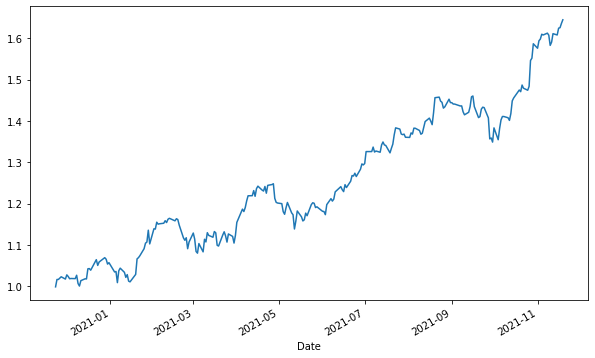

In [136]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));
#graph of the daily return

RESAMPLING

In [137]:
data.resample('1w', label='right').last().head()

#the data has been resampled from daily to weekly frequency (For the coursework it has been chosen to work with daily freqquency)

Date
2020-11-22    208.641113
2020-11-29    213.440872
2020-12-06    212.578110
2020-12-13    211.487244
2020-12-20    216.772934
Freq: W-SUN, Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

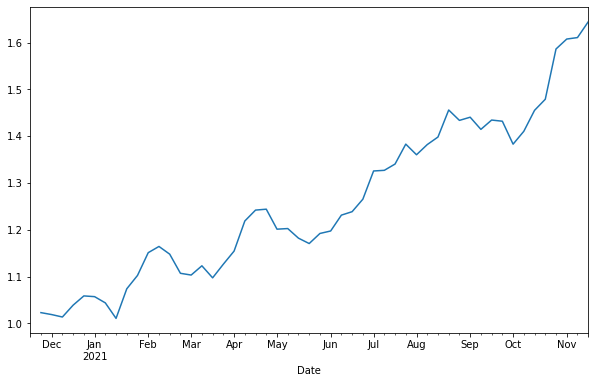

In [182]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

SPOT PRICE

In [21]:
S = data [-1]
print ('The spot price is', round(S,2))

#This is the spot price of the last adjusted close downloaded from yahoo finance

The spot price is 343.11


MICROSOFT VOLATILITY

In [22]:
log_return = np.log(data / data.shift(1))

#To calculate the volatility,the log return calculation is needed

array([<AxesSubplot:xlabel='Date'>], dtype=object)

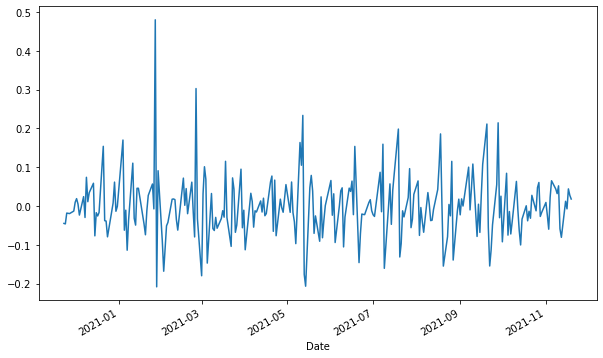

In [298]:
log_return.dropna(inplace=True)
log_return.plot(subplots=True, figsize=(10, 6))

#Graph that shows the daily log return movement 

In [23]:
vol = np.sqrt(252) * log_return.std()
print ('The annualised volatility is', round(vol*100,2), '%')  

#Volatility is calculated by the frequency. Because this is daily data, we need to square root 252.

The annualised volatility is 19.76 %


In [8]:
first6months_data = yf.download("MSFT", start="2020-11-20", end="2021-5-20")

#To calculate the first 6 months volatility, the first six months data has been downloaded.

[*********************100%***********************]  1 of 1 completed


In [9]:
first6months_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-13,241.800003,245.600006,241.419998,243.029999,241.564865,29624300
2021-05-14,245.580002,249.179993,245.490005,248.149994,246.653992,23901100
2021-05-17,246.550003,246.589996,243.520004,245.179993,243.701920,24970200
2021-05-18,246.270004,246.410004,242.899994,243.080002,241.614563,20168000
2021-05-19,239.309998,243.229996,238.600006,243.119995,242.212311,25739800


In [10]:
data_2 = first6months_data  ['Adj Close']

In [11]:
data_2.tail()

Date
2021-05-13    241.564865
2021-05-14    246.653992
2021-05-17    243.701920
2021-05-18    241.614563
2021-05-19    242.212311
Name: Adj Close, dtype: float64

In [13]:
log_return_2 = np.log(data_2 / data_2.shift(1))

#First 6 months log return

In [15]:
first6months_vol = np.sqrt(252) * log_return_2.std()
print ('The first six months volatility is', round(first6months_vol*100,2), '%')  

#first six months volatility 

The first six months volatility is 22.5 %


In [25]:
second6months_data = yf.download("MSFT", start="2021-5-20", end="2021-11-20")#second 6 months data downloaded to calculate its volatility

[*********************100%***********************]  1 of 1 completed


In [26]:
second6months_data.tail()  #quick check if the data downloaded is right

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-15,337.540009,337.880005,334.029999,336.070007,335.456299,16723000
2021-11-16,335.679993,340.670013,335.510010,339.510010,338.890015,20886800
2021-11-17,338.940002,342.190002,338.000000,339.119995,339.119995,19053400
2021-11-18,338.179993,342.450012,337.119995,341.269989,341.269989,22463500
2021-11-19,342.640015,345.100006,342.200012,343.109985,343.109985,21963400


In [27]:
data_3 = second6months_data  ['Adj Close']  #same concept as above, the data has been named data_3 so separate it from the previous ones and avoid errors

In [28]:
data_3.head()

Date
2021-05-19    242.212326
2021-05-20    245.559784
2021-05-21    244.254669
2021-05-24    249.843735
2021-05-25    250.780228
Name: Adj Close, dtype: float64

In [29]:
data_3.tail()

Date
2021-11-15    335.456299
2021-11-16    338.890015
2021-11-17    339.119995
2021-11-18    341.269989
2021-11-19    343.109985
Name: Adj Close, dtype: float64

In [30]:
log_return_3 = np.log(data_3 / data_3.shift(1))  #log return calculation of the last 6 months

In [31]:
second6months_vol = np.sqrt(252) * log_return_3.std()
print ('The second six months volatility is', round(second6months_vol*100,2), '%')  #volatility calculation. Last six months have been less volatile than the previous six

The second six months volatility is 16.77 %


In [276]:
VIX = yf.download("^VIX", start="2020-11-20", end="2021-11-20")  #The VIX has been downloaded to calculate the annualised market volatility 

[*********************100%***********************]  1 of 1 completed


In [285]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

#Annualised market volatility

The market volatility is 17.91 %


DATA INPUT-MONTECARLO SIMULATION

In [20]:
def mcs_simulation_np(p):
    M = p               #p = time steps
    I = p               #p = number of times the simulation is run
    dt = T / M           #time / time steps
    S = np.zeros((M + 1, I))
    S[0] = S0                  # starting point
    rn = np.random.standard_normal(S.shape)   #random variable follows standard normal distribution
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) #formula
    return S

In [21]:
T = 4/52
r = 0.0154
sigma = 0.1976
S0 = 343.11
K = 350                 

#values for formula

In [22]:
S = mcs_simulation_np(1000) #montecarlo model with 1000 simulation

In [23]:
S = np.transpose(S)
S

array([[343.11      , 342.13359933, 341.93755124, ..., 318.11196681,
        318.30932087, 317.13557364],
       [343.11      , 343.35265661, 342.69627573, ..., 366.08476763,
        366.65167747, 366.15688147],
       [343.11      , 342.40732638, 342.53060896, ..., 351.29967763,
        350.26994398, 350.94468551],
       ...,
       [343.11      , 344.14966553, 343.71869896, ..., 339.95331069,
        340.73304801, 340.20202038],
       [343.11      , 343.0942496 , 342.82380431, ..., 351.66275921,
        350.37322819, 349.86477264],
       [343.11      , 343.26420062, 343.77056253, ..., 339.86866449,
        339.82784067, 339.91682299]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

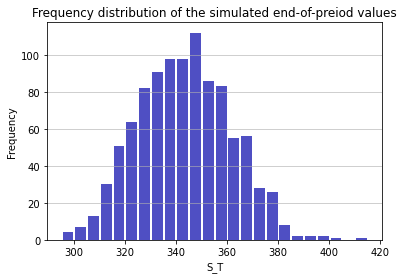

In [24]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')


#the simulation follows a log normal ditribution

In [25]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))   # the formula takes into consideration only the last column, and then will take its mean to create the result

#every time the montecarlo simulation is run, the result will change

European call 4.472037975229852


In [26]:
S = mcs_simulation_np(5000)  #montecarlo simulation with 5000 simulations 

In [27]:
S = np.transpose(S)
S

array([[343.11      , 342.87067382, 342.48715962, ..., 346.00676424,
        345.4603551 , 345.64736933],
       [343.11      , 343.40411126, 343.56108592, ..., 378.34289428,
        377.86476309, 377.09024327],
       [343.11      , 342.89279007, 342.61101223, ..., 317.78841056,
        317.62419324, 317.98713974],
       ...,
       [343.11      , 343.20291629, 342.94889965, ..., 368.25923259,
        368.32236417, 368.04951102],
       [343.11      , 343.06178849, 343.3449445 , ..., 315.73177375,
        316.08261615, 315.78080733],
       [343.11      , 343.37682867, 343.24743349, ..., 339.02190853,
        338.59970213, 338.47807878]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

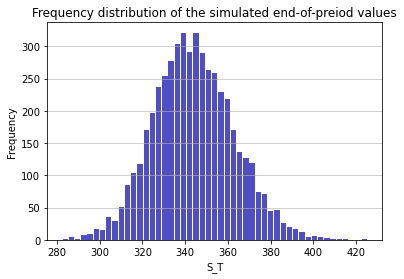

In [28]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

#Graph that shows log normal distribution

In [29]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

#European call price with 5000 simulation

European call 4.982406770215356


In [30]:
S = mcs_simulation_np(10000) #montecarlo simulation with 10000 simulation

In [31]:
S = np.transpose(S)
S

#the highest is the number of simulation, the more actual the result will be

array([[343.11      , 343.47657739, 343.5290347 , ..., 332.56124811,
        332.60836226, 332.44908665],
       [343.11      , 342.98803525, 343.3152445 , ..., 324.61441486,
        324.56651571, 324.79700143],
       [343.11      , 343.00020843, 342.93905792, ..., 355.60849823,
        355.75962894, 355.89804995],
       ...,
       [343.11      , 342.97695852, 342.86480507, ..., 340.35073922,
        340.40069771, 340.30896686],
       [343.11      , 343.25722559, 343.13625549, ..., 355.74574928,
        355.54304267, 355.30340156],
       [343.11      , 343.20101353, 343.44825138, ..., 350.71834082,
        350.92456418, 351.15258847]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

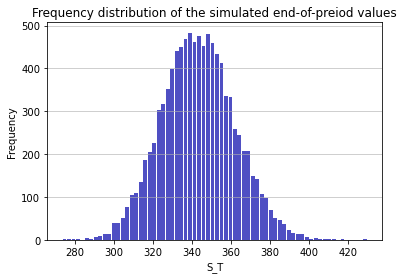

In [32]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

#Graph that shows log normal distribution

In [33]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

#European call price with 10000 steps

European call 4.692113407072265


BLACKSHOLES MODEL

In [45]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        
        #Black Sholes Formula

    
    return option_value

In [46]:
euro_option_bsm(343.11, 350, 4/52, 0.0154, 0.0073, 0.1976, 'call')  #option price through BSM with annualised volatility 

4.697792081196852

In [47]:
T = np.linspace(1/52,8/52,12)    #diffreent time of maturity, the calculation will provide 12 numbers, 12 call prices
cpd  = np.zeros((len(T),1)) #cpd = call option price with dividends
for i in range(len(T)):
    cpd [i] = euro_option_bsm(343.11, 350, T[i], 0.0154, 0.0073, 0.1976, 'call') 

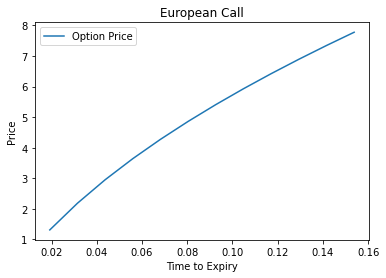

In [48]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

#The graph shows how price decreases and time decreases

OPTION TRADING

In [67]:
MSFT = yf.Ticker('MSFT')
opt = MSFT.option_chain('2021-12-17')   #chain is time to maturity 
opt.calls

#this code allows to import the same values of yahoo finance in to python through API

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT211217C00145000,2021-11-16 18:02:43,145.0,195.30,175.80,180.00,0.0,0.0,90,0,2.446781,True,REGULAR,USD
1,MSFT211217C00150000,2021-11-16 18:02:43,150.0,190.20,170.70,175.00,0.0,0.0,90,2,2.354985,True,REGULAR,USD
2,MSFT211217C00155000,2021-12-01 16:57:49,155.0,182.50,165.75,170.40,0.0,0.0,3,3,1.390628,True,REGULAR,USD
3,MSFT211217C00160000,2021-12-02 17:03:07,160.0,170.45,160.75,165.00,0.0,0.0,3,8,2.179692,True,REGULAR,USD
4,MSFT211217C00165000,2021-12-02 20:31:40,165.0,165.55,156.50,159.00,0.0,0.0,17,23,1.837891,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,MSFT211217C00455000,2021-11-15 15:15:58,455.0,0.02,0.00,0.05,0.0,0.0,1,64,0.605473,False,REGULAR,USD
69,MSFT211217C00460000,2021-11-22 15:39:22,460.0,0.04,0.00,0.04,0.0,0.0,70,195,0.609379,False,REGULAR,USD
70,MSFT211217C00465000,2021-11-26 17:51:00,465.0,0.01,0.00,0.03,0.0,0.0,2,122,0.609379,False,REGULAR,USD
71,MSFT211217C00470000,2021-11-23 15:07:44,470.0,0.01,0.00,0.01,0.0,0.0,1,170,0.578129,False,REGULAR,USD


In [50]:
S = initial_data['Adj Close'][-1]
K = opt.calls['strike']
T = 4/52
r = 0.0154
q = 0.0073
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol


#this is the code to calculate volatility to implement BSM in the table

0.19756718123442857

In [51]:
MSFT_bsm_call = np.zeros((len(K),1))   # the loop will create 73 results
for i in range(len(K)):
    MSFT_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [64]:
opt.calls['BSMPrice'] = pd.DataFrame(MSFT_bsm_call).round(2)
opt.calls.loc [38:48]

#this code will create another column to our previous dataframe

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error
38,MSFT211217C00327500,2021-12-03 20:59:36,327.5,6.00,5.75,6.30,-2.25,-27.272728,566,591,0.328742,False,REGULAR,USD,17.78,-66.254218
39,MSFT211217C00330000,2021-12-03 20:59:43,330.0,4.75,4.75,5.00,-2.65,-35.810810,4790,6880,0.314216,False,REGULAR,USD,15.84,-70.012626
40,MSFT211217C00332500,2021-12-03 20:59:09,332.5,3.90,3.45,4.05,-1.65,-29.729730,453,1358,0.308723,False,REGULAR,USD,14.01,-72.162741
41,MSFT211217C00335000,2021-12-03 20:58:52,335.0,3.00,2.83,3.15,-1.96,-39.516130,2061,7169,0.299812,False,REGULAR,USD,12.29,-75.589910
42,MSFT211217C00337500,2021-12-03 20:59:47,337.5,2.37,2.11,2.44,-1.33,-35.945950,539,1467,0.293952,False,REGULAR,USD,10.70,-77.850467
43,MSFT211217C00340000,2021-12-03 20:59:59,340.0,1.81,1.70,1.82,-1.04,-36.491226,4325,30554,0.286384,False,REGULAR,USD,9.24,-80.411255
44,MSFT211217C00342500,2021-12-03 20:58:30,342.5,1.34,1.28,1.39,-0.88,-39.639640,271,769,0.283943,False,REGULAR,USD,7.90,-83.037975
45,MSFT211217C00345000,2021-12-03 20:56:46,345.0,1.02,0.87,1.02,-0.76,-42.696630,3248,15327,0.279548,False,REGULAR,USD,6.71,-84.798808
46,MSFT211217C00347500,2021-12-03 20:53:43,347.5,0.74,0.48,0.78,-0.62,-45.588234,393,1658,0.280036,False,REGULAR,USD,5.64,-86.879433
47,MSFT211217C00350000,2021-12-03 20:59:22,350.0,0.54,0.53,0.59,-0.44,-44.897957,3122,37460,0.280281,False,REGULAR,USD,4.70,-88.510638


In [65]:
opt.calls['estimate_error'] = ((opt.calls['lastPrice'] - opt.calls['BSMPrice'])/opt.calls['BSMPrice'])*100
opt.calls['estimate_error'].loc [38:48]

#The tables shows how the chosen option is undervalued following the Black Sholes result

38   -66.254218
39   -70.012626
40   -72.162741
41   -75.589910
42   -77.850467
43   -80.411255
44   -83.037975
45   -84.798808
46   -86.879433
47   -88.510638
48   -91.167192
Name: estimate_error, dtype: float64

In [54]:
opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

#description of the estimate of error of calculation

count     59.000000
mean     -37.264711
std       36.757839
min      -91.406250
25%      -69.621698
50%      -31.447831
75%      -10.230040
max      100.000000
Name: estimate_error, dtype: float64

GREEKS

DELTA

In [1]:
def delta(S, K, T, r, q, vol, payoff):
    
    #Black Scholes formula to calculate the greeks, d1 is the dividend discount factor
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)  #cdf = Cumulative distribution function.
        #0 to 1 = standard normal distribution
    
    return delta


In [5]:
S = np.linspace(250, 450, 25)
T = np.linspace(1/52, 8/52, 25)     
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 350, T[i], 0.0154, 0.0073, 0.1976, 'call')
        
        #Delta is calculated to determine the rate of change of the option value in relation to changes in the underlying asset's price

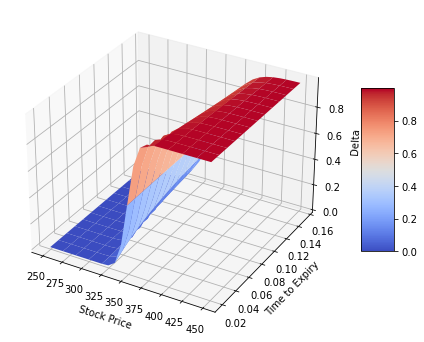

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

#3D figure

In [37]:
S = np.linspace(250,450,11)
Delta_Call = np.zeros((len(S),1))

for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 340, 4/52, 0.0154, 0.0073, 0.1976, 'call')
    
    #same calculation to plot 2D figure

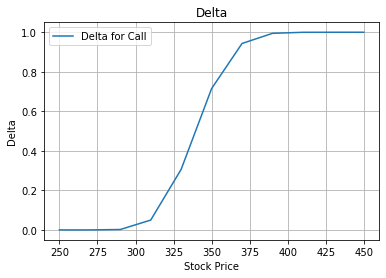

In [38]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

#2D figure

In [49]:
d = delta(343.11, 350, 4/52, 0.0154, 0.0073, 0.1976,'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.3728 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.3728 .


GAMMA

In [9]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma   #gamma we do not need repetition as the formula is the same for put and call

In [10]:
S = np.linspace(250, 450, 25)
T = np.linspace(1/52, 8/52, 25)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 350, T[i], 0.0154, 0.0073, 0.1976, 'call')
        
        # Gamma is the second derivative of the value function concerning the underlying price

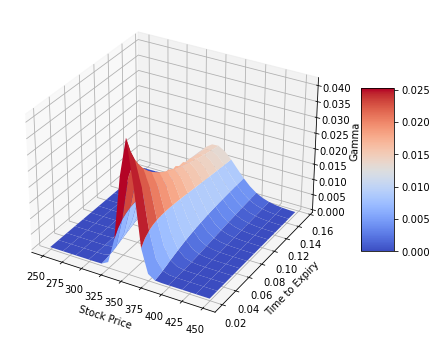

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);  

# left shows that it is in the money for put and OTM for call, The right part shows the opposite
# even if its gamma, we say that DELTA changes by 0.015 if the price moves bt $1

In [13]:
S = np.linspace(250,450,25)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 350, 4/52, 0.0154, 0.0073, 0.1976, 'call')
    
    #Same calculation to plot 2D figure

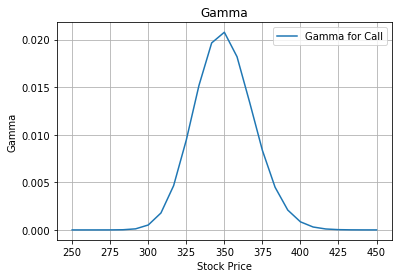

In [14]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

#2D figure

In [10]:
g = gamma(343.11, 350, 4/52, 0.0154, 0.0073, 0.1976,'call')
print('The value of Gamma is', g.round(4),'.','If the stock price increase 1 dollar, then the value of the Delta will increase $', g.round(4), '.')

The value of Gamma is 0.0201 . If the stock price increase 1 dollar, then the value of the Delta will increase $ 0.0201 .


THETA

In [17]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K
        
        return theta
    
    #Theta measures the change of the option’s value to the passage of time as it decays 

In [18]:
S = np.linspace(250, 450, 25)
T = np.linspace(1/52, 8/52, 25)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 350, T[i], 0.0154, 0.0073, 0.1976, 'call')
        
        #loop to calculate decrease of Theta overtime

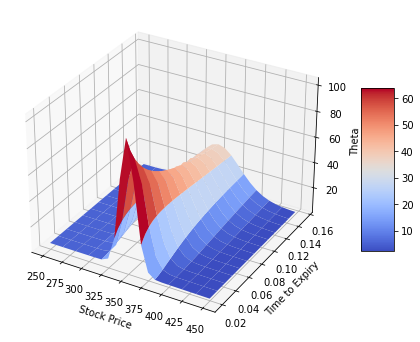

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

#3D graph

In [20]:
T = np.linspace(1/52,8/52,25)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(343.11, 350, T[i], 0.154, 0.0073, 0.01976, 'call')

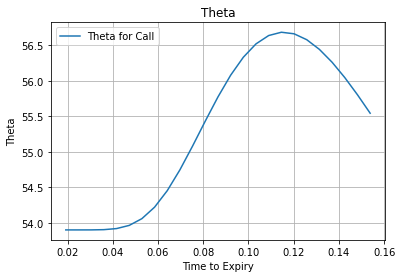

In [21]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

#2D graph

In [22]:
t = theta(343.11, 350, 4/52, 0.0154, 0.0073, 0.1976,'call')
print('The value of Theta is', t.round(4),'.','If the time of maturity decreases by a week, then the value of the option will decrease $', t.round(4)*1/52, '.')

The value of Theta is 50.6978 . If the time of maturity decreases by a week, then the value of the option will decrease $ 0.9749576923076924 .


RHO

In [24]:
def rho(S, K, T, r, q, vol, payoff):
    
    
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return rho

#when calculatiung rho we only need to take into consideration D2

In [25]:
S = np.linspace(250, 450, 25)
T = np.linspace(1/52, 8/52, 25)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 350, T[i], 0.0154, 0.0073, 0.1976, 'call')
        
        #Rho is the derivate of the option price concerning the risk-free interest rate

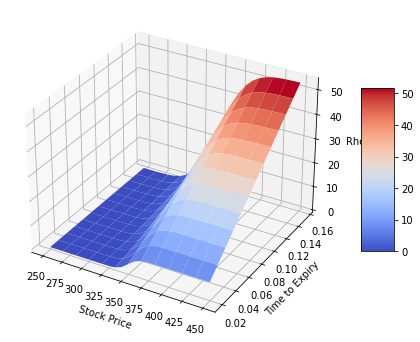

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

#3D graph

In [27]:
r = np.linspace(0,0.1,25)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(343.11, 350, 4/52, r[i], 0.0073, 0.1976, 'call')

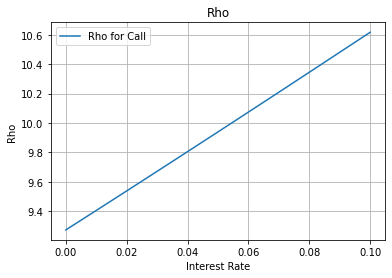

In [28]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

#2D graph

In [29]:
r = rho(343.11, 350, 4/52, 0.0154, 0.0073, 0.1976, 'call')
print('The value of Rho is', r.round(4),'.','If the risk free rate increases 0.01, then the value of the option will increase $', r.round(4)*0.01, '.')

The value of Rho is 9.4768 . If the risk free rate increases 0.01, then the value of the option will increase $ 0.094768 .


VEGA

In [30]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

#Vega only has one formula for call and put because it calculates the changes in price of the underlying asset price caused by an increase or decrease of volatility

In [32]:
S = np.linspace(250, 450, 25)
T = np.linspace(1/52, 8/52, 25)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 350, T[i], 0.0154, 0.0073, 0.1976, 'call')
        
        #Finally, Vega is the Greek that measures the sensitivity of the option price with respect to the volatility of the underlying asset 

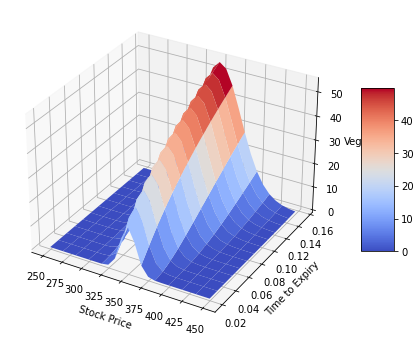

In [33]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

#3D graph

In [34]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(343.11, 350, 4/52, 0.0154, 0.0073, vol[i], 'call')

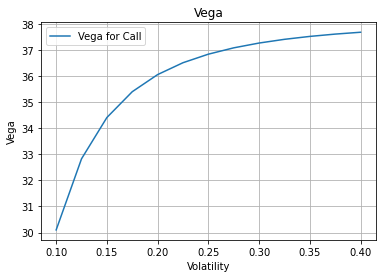

In [35]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

#2D graph

In [36]:
v = vega(343.11, 350, 4/52, 0.0154, 0.0073, 0.1976, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 10%, then the value of the option will increase $', v.round(4)*0.1, '.')

The value of Vega is 36.0024 . If the volatility increases 10%, then the value of the option will increase $ 3.6002400000000003 .
